### Import Data from Kaggle

In [1]:
# mount to the Google Drive to access the uploaded 'kaggle.json' file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install kaggle
!pip install kaggle

In [3]:
# configure the kaggle API access
# create a directory for kaggle in the Colab environment
# copy the kaggle.json file from the Google Drive
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [4]:
# set permission to the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download the dataset using the kaggle API command
!kaggle datasets download gunavenkatdoddi/eye-diseases-classification

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 97% 710M/736M [00:08<00:01, 14.9MB/s]
100% 736M/736M [00:08<00:00, 92.1MB/s]


In [6]:
# unzip the download dataset
!unzip eye-diseases-classification.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

### Import Essential Libraries

In [7]:
# import essential libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

### Data Loading

In [8]:
# specified the data directory
data_directory = '/content/dataset'

In [9]:
# create a dataframe with the image path and label
path = []
label = []

folder_name = os.listdir(data_directory)
for name in folder_name:
    folder_path = os.path.join(data_directory, name)
    items = os.listdir(folder_path)
    for item in items:
        img_path = os.path.join(folder_path, item)
        if img_path.lower().endswith(('.png','.jpg','.jpeg')):
            path.append(img_path)
            label.append(name)

In [10]:
# create a dataframe for the dataset
df = pd.DataFrame([path, label]).T
df.columns = ['Path', 'Labels']
df.head(n=5)

,Path,Labels
0,/content/dataset/diabetic_retinopathy/10504_le...,diabetic_retinopathy
1,/content/dataset/diabetic_retinopathy/10408_le...,diabetic_retinopathy
2,/content/dataset/diabetic_retinopathy/1020_rig...,diabetic_retinopathy
3,/content/dataset/diabetic_retinopathy/10977_le...,diabetic_retinopathy
4,/content/dataset/diabetic_retinopathy/1100_lef...,diabetic_retinopathy


In [11]:
# number of classes in the dataset
num_class = df['Labels'].nunique()
class_label = df['Labels'].unique()

print('There are {} classes in the dataset. These are: {}'.format(num_class, class_label))

# number of instances in the dataset
df_dimension = df.shape
print('The dataset contains {} instances.'.format(df_dimension[0]))

There are 4 classes in the dataset. These are: ['diabetic_retinopathy' 'normal' 'glaucoma' 'cataract']
The dataset contains 4217 instances.


In [12]:
# helper function to visualize the images of different classes
def plot_images(img_class):
  df_subset = df[df['Labels']==img_class]
  df_sampling = df_subset.sample(n=4)
  plt.figure(figsize=(12,4))
  for img, i in zip(df_sampling['Path'], range(4)):
    plt.subplot(1,4,i+1)
    plt.imshow(plt.imread(img))
    plt.axis('off')
    plt.title(img_class, fontsize=10)
  plt.tight_layout()
  plt.show()

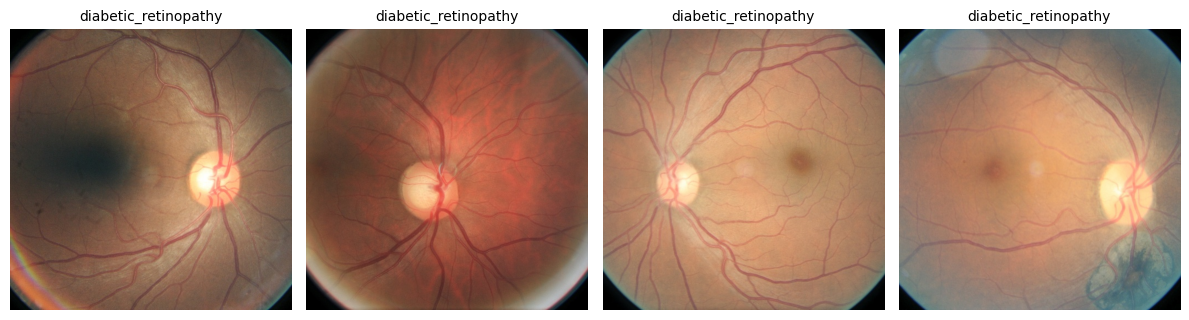

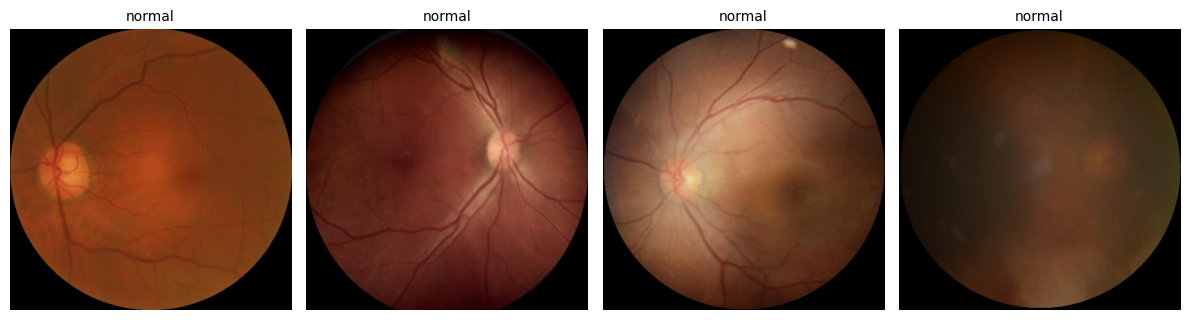

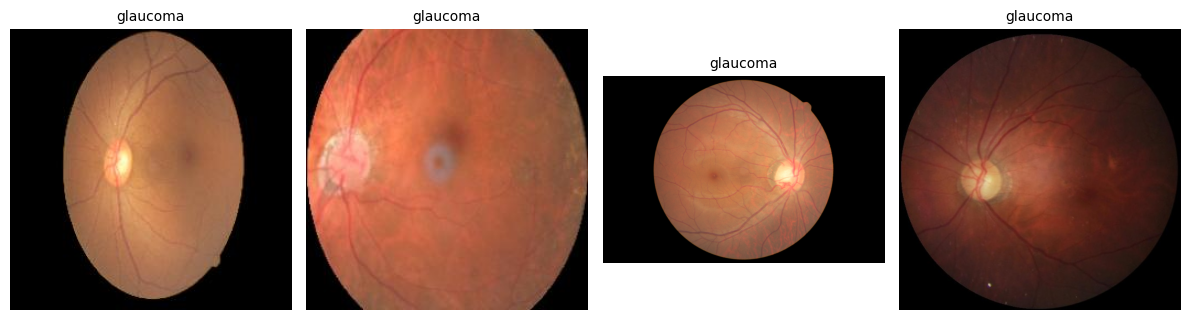

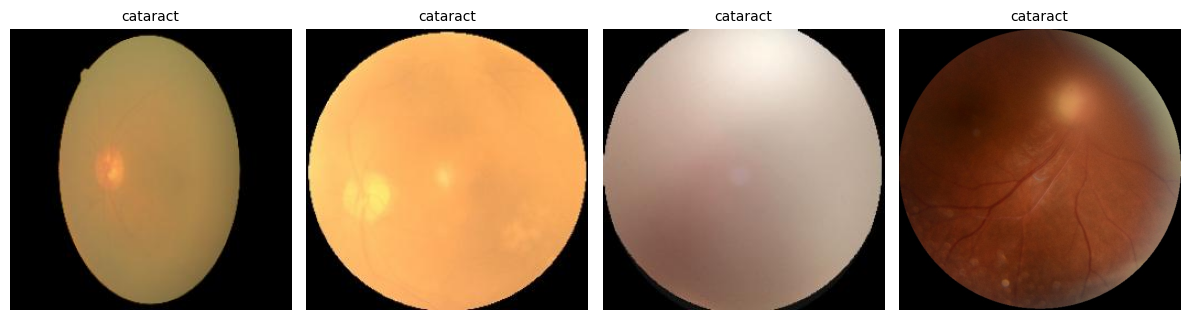

In [13]:
# example images for each class in the dataset
for label in class_label:
  plot_images(label)

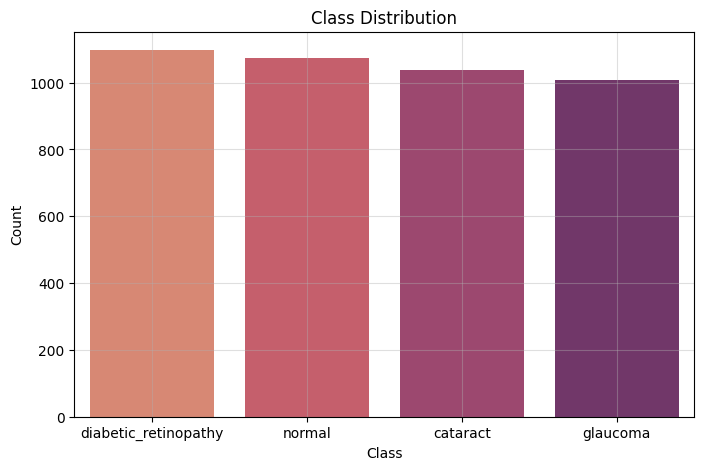

In [14]:
# distribution of each class in the dataset
label_count = df['Labels'].value_counts()


plt.figure(figsize=(8,5))
sns.barplot(x=label_count.index, y=label_count.values, hue=label_count.index, legend=False, palette='flare')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(alpha=0.4)
plt.show()

### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

train_df, X = train_test_split(df, test_size=0.3, stratify=df['Labels'], shuffle=True, random_state=122)
test_df, val_df = train_test_split(X, test_size=0.5, stratify=X['Labels'], shuffle=True, random_state=122)

# dimension of each datasets
print('The dimension of the training dataset:', train_df.shape)
print('The dimension of the test dataset:', test_df.shape)
print('The dimension of the validation dataset:', val_df.shape)

The dimension of the training dataset: (2951, 2)
The dimension of the test dataset: (633, 2)
The dimension of the validation dataset: (633, 2)


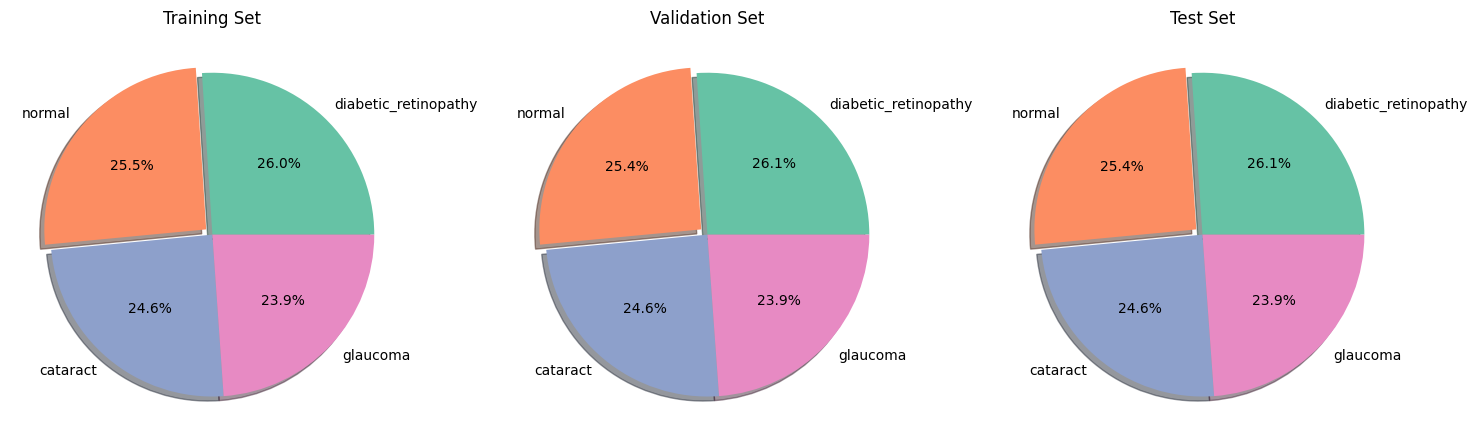

In [24]:
datasets = [train_df, val_df, test_df]
data_name = ['Training Set', 'Validation Set', 'Test Set']
colors = []
explode = [0, 0.05, 0, 0]

plt.figure(figsize=(15,5))
for data, i, name in zip(datasets, range(len(datasets)), data_name):
  plt.subplot(1,3,i+1)
  label_count = data['Labels'].value_counts()
  plt.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), shadow=True, explode=explode)
  plt.title(name)
plt.tight_layout()
plt.show()

In [ ]:
# export the datasets and will be used for training different models
train_df.to_csv('/content/drive/MyDrive/dataset/eye_train.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/dataset/eye_test.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/dataset/eye_val.csv', index=False)